## Comparison between AutoMS and CNN

Here, we compare AutoMS with CNN based peak picking with the evaluating data. ROIs extracted with HPIC are processed by AutoMS and CNN respectively. First, we display the distribution of AutoMS scores of peaks and noises predicted by CNN. Second, we display the profiles which were given conflicting predition.

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from AutoMS import hpic
from AutoMS import peakeval

### ROI extraction with HPIC

In [2]:
file = 'data/600mix_pos.mzML'
peaks, pics = hpic.hpic(file, min_intensity=500, min_snr=1, mass_inv=1, rt_inv=30)

### Peak evaluation with CNN and AutoMS

In [3]:
scores, mspd_snrs, cnn_output, X, X_rebuild, dist_eval = peakeval.evaluate_peaks(peaks, pics, cal_snr=False, use_cnn=True)

100%|███████████████████████████████████████████████████████████████████████████| 25257/25257 [03:37<00:00, 116.20it/s]


790/790 [==============================] - 2s 2ms/step


Here, we display the distribution of AutoMS scores of peaks and noises predicted by CNN. Too narrow peaks were removed as they took up a major part and will mess up the visulation.Their scores are usually less than 0.

In [4]:
k = scores > 0

scores_peaks = scores[np.logical_and(cnn_output == 0, k)]
scores_noise = scores[np.logical_and(cnn_output == 1, k)]

Then, plot the distribution.

C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


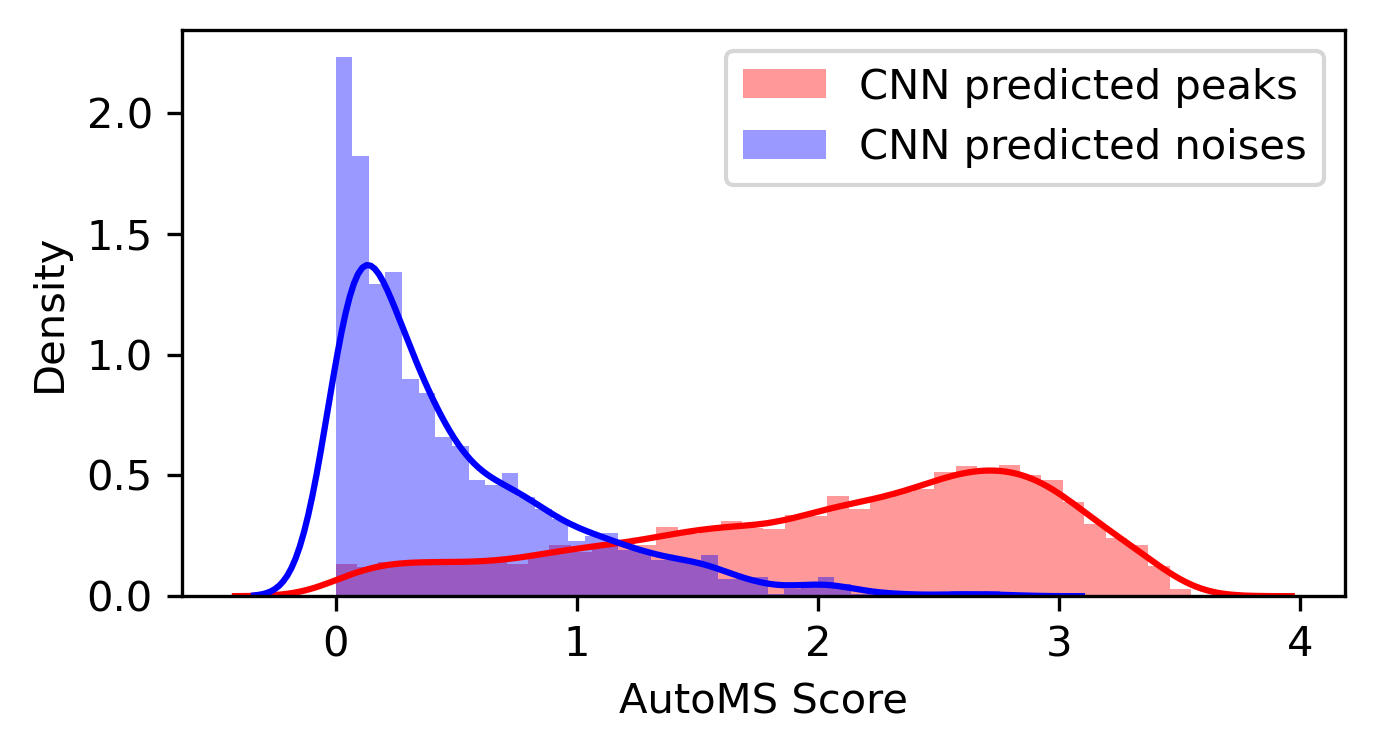

In [5]:
plt.figure(dpi = 300, figsize = (5,2.5))
sns.distplot(scores_peaks, kde=True, bins = 40, label = 'CNN predicted peaks', color = 'red')
sns.distplot(scores_noise, kde=True, bins = 40, label = 'CNN predicted noises', color = 'blue')
plt.xlabel('AutoMS Score', fontsize = 10)
plt.legend()

Here, we display the peak profiles with conflicting predictions.First,find the noise predicted by CNN, but given high score by AutoMS.

In [6]:
temp1 = np.where(np.logical_and(scores > 2, cnn_output == 1))
len(temp1[0])

21

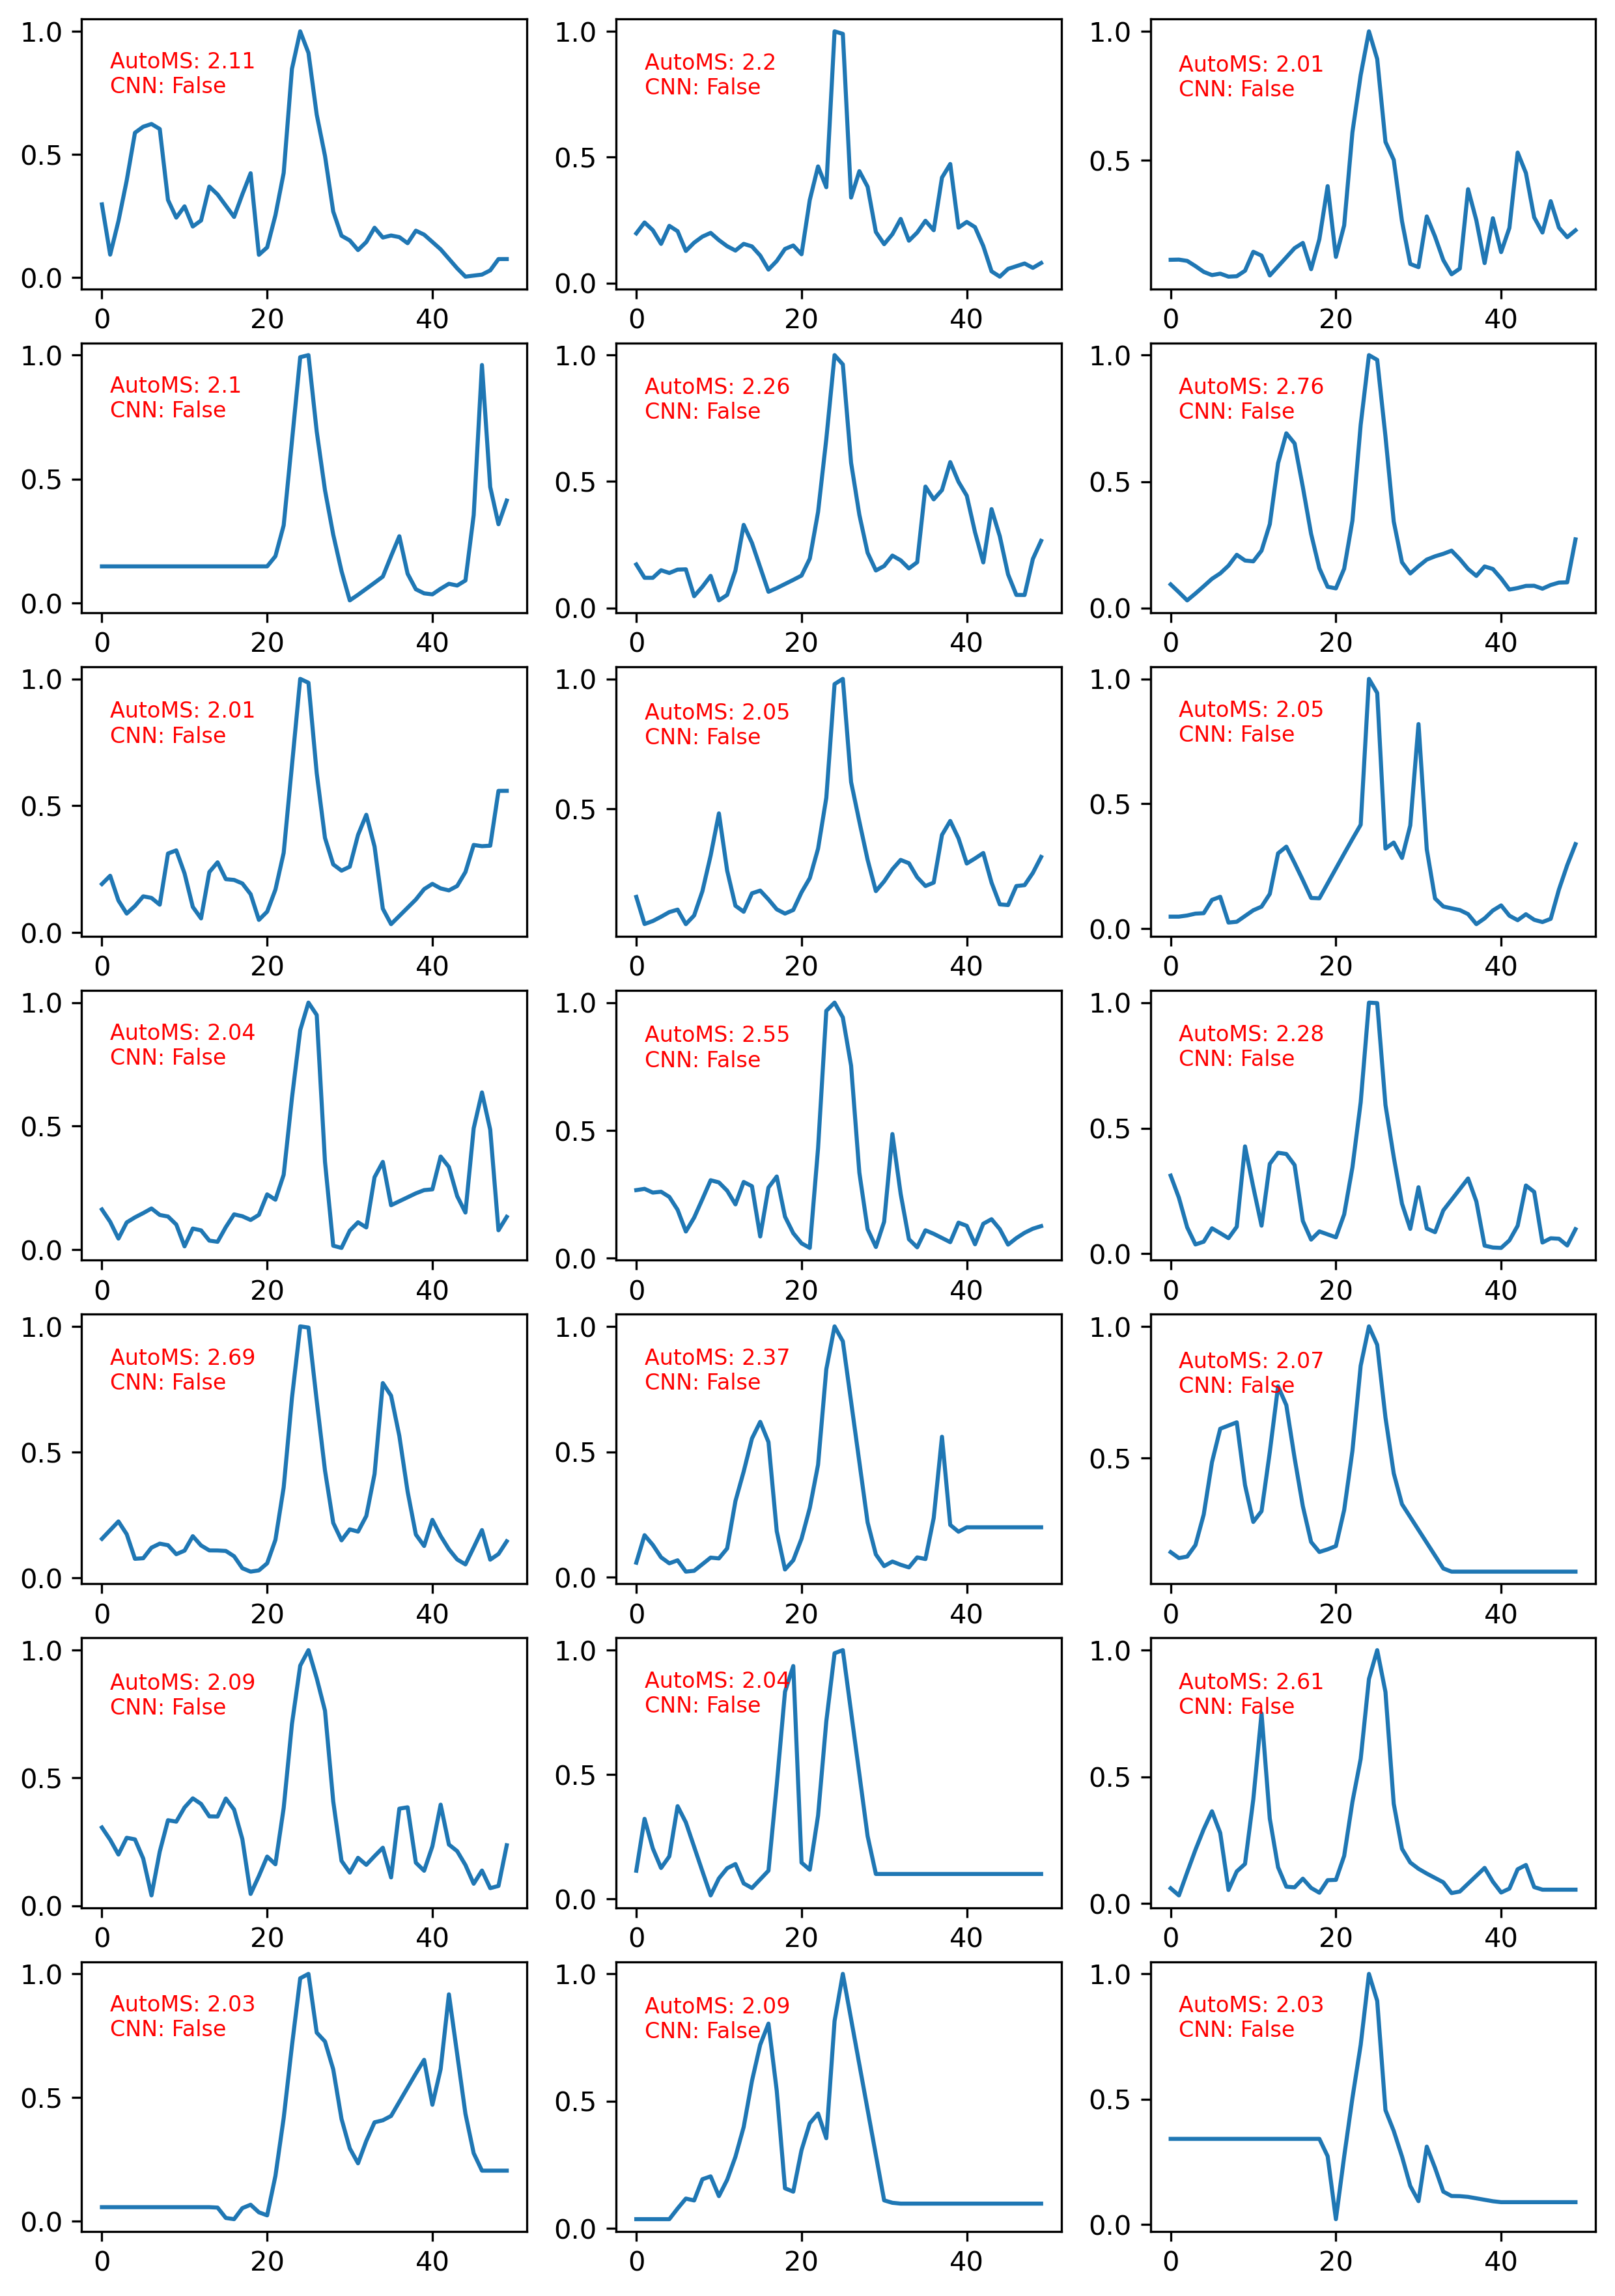

In [7]:
plt.figure(dpi = 300, figsize = (10,15))
for i,j in enumerate(temp1[0]):
    plt.subplot(7,3,i+1)
    plt.plot(X[j,:])
    plt.text(1, 0.75, 'AutoMS: {} \nCNN: False'.format(np.round(scores[j], 2)), fontsize = 8, color = 'red')

Then,find the peaks predicted by CNN, but given low score by AutoMS

In [8]:
temp2 = np.where(np.logical_and(np.logical_and(scores < 0.3, scores > 0.01), cnn_output == 1))
len(temp2[0])

658

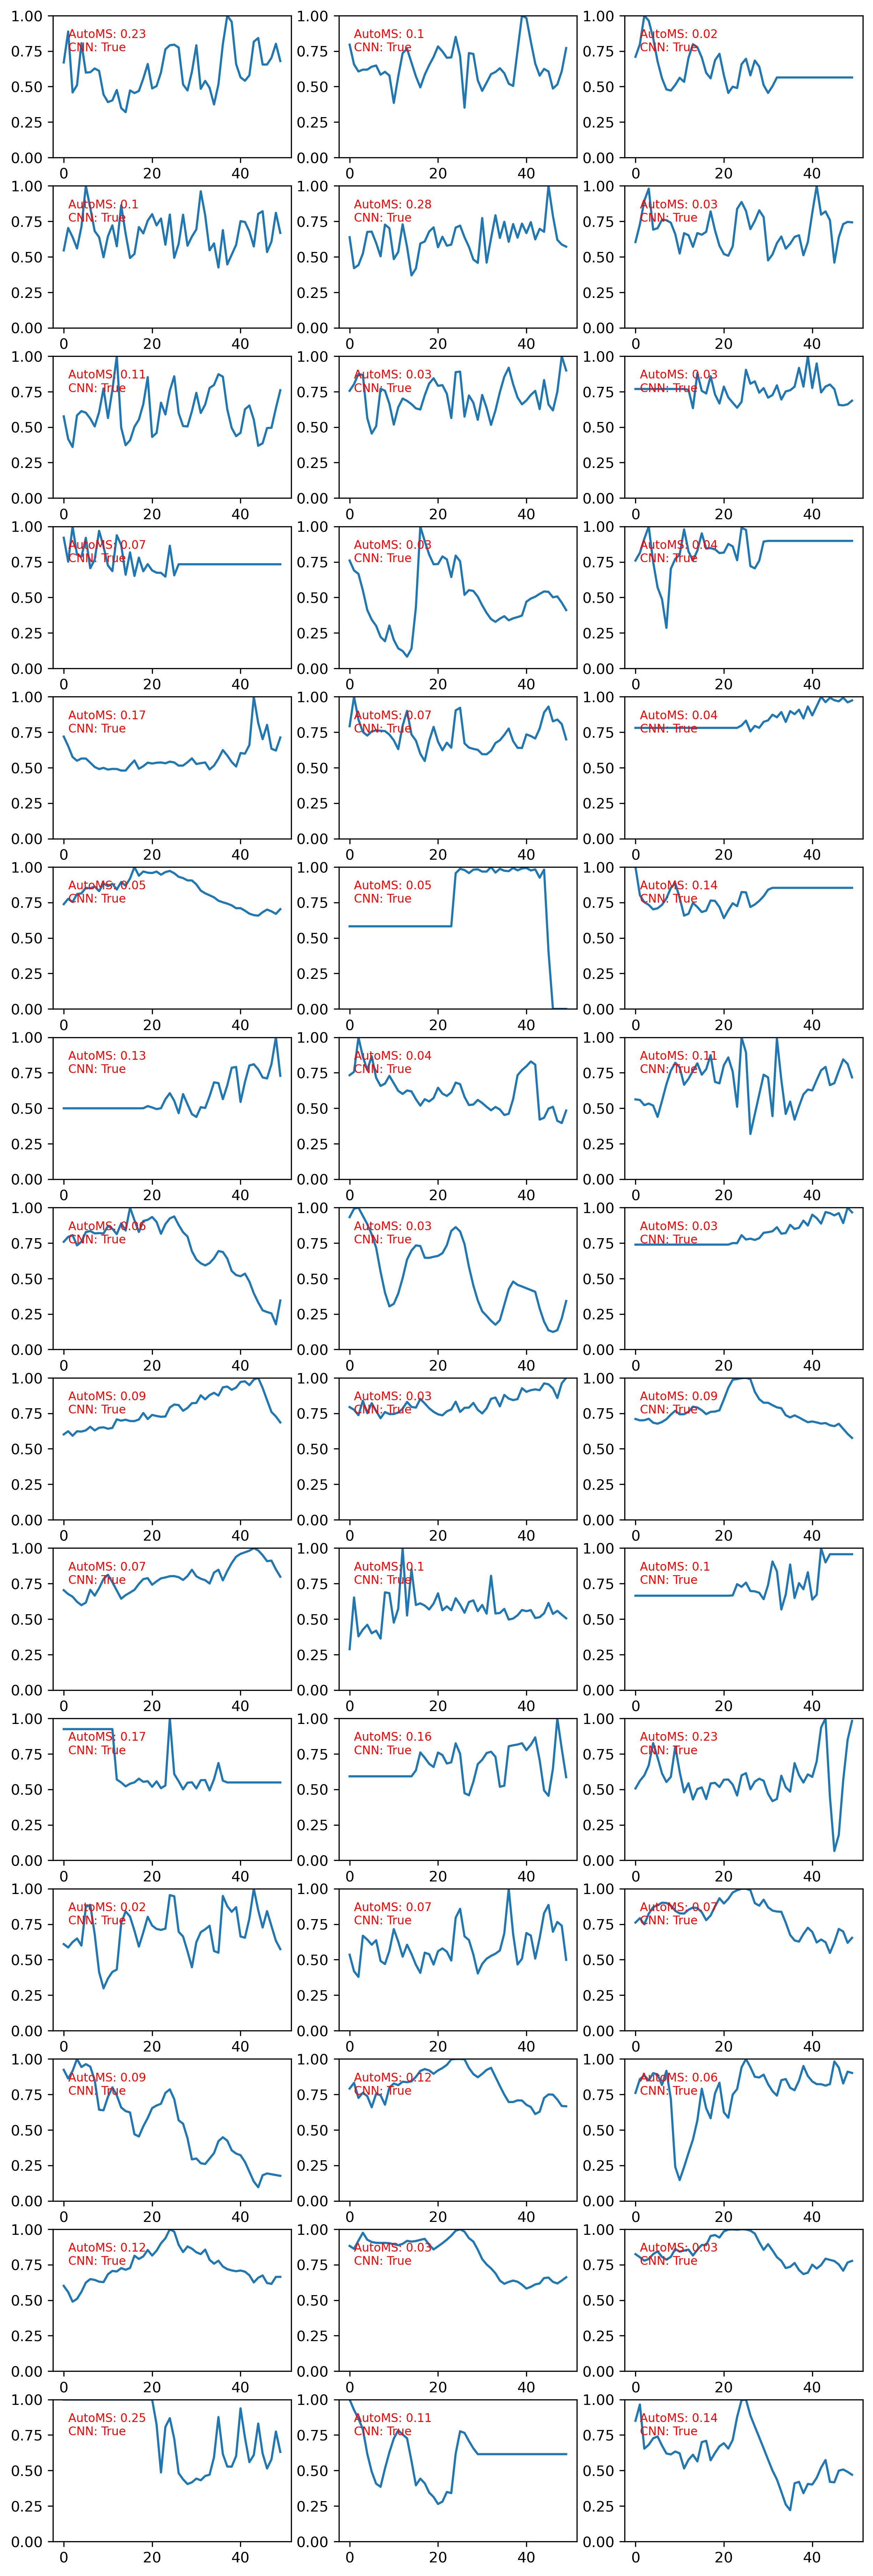

In [9]:
# Display the first 45 peaks
plt.figure(dpi = 300, figsize = (10,32))
for i,j in enumerate(temp2[0][:45]):
    plt.subplot(15,3,i+1)
    plt.plot(X[j,:])
    plt.ylim(0, 1)
    plt.text(1, 0.75, 'AutoMS: {} \nCNN: True'.format(np.round(scores[j], 2)), fontsize = 8, color = 'red')